The required predictive distribution is given by

$$\begin{align*}
p(t_{N+1} = 1|\mathbf{t}_N) = \int p(t_{N+1}=1|a_{N+1})\color{red}{p(a_{N+1}|\mathbf{t}_N)} da_{N+1} \tag{6.76} \\
\end{align*}$$

where
- $p(t_{N+1} = 1|a_{N+1}) = \sigma(a_{N+1})$ is a sigmoid function.
- $\color{red}{p(a_{N+1}|\mathbf{t}_N)}$ is a complex non-linear function. As a result, the integral is analytically intractable. There are numbers of methods to deal with this situation. Here, we shall make use of the technique called Laplace approximation that we have derived in Section 4.5.2. This method will provide us a Gaussian approximation to the distribution $p(a_{N+1}|\mathbf{t}_N)$.

The usual justification for a Gaussian approximation to a posterior distribution is that the true posterior will tend to a Gaussian as the number of data points increases as a consequence of the central limit theorem.

# Laplace approximation

$$\begin{align*}
\color{red}{p(a_{N+1}|\mathbf{t}_N)} &= \frac{p(a_{N+1}, \mathbf{t}_N)}{p(\mathbf{t}_N)} \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}, \mathbf{a}_N, \mathbf{t}_N) d \mathbf{a}_N\qquad \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}, \mathbf{a}_N)p(\mathbf{t}_N|a_{N+1}, \mathbf{a}_N) d \mathbf{a}_N \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}| \mathbf{a}_N)p(\mathbf{a}_N)p(\mathbf{t}_N|a_{N+1}, \mathbf{a}_N) d \mathbf{a}_N \\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}| \mathbf{a}_N)p(\mathbf{a}_N)p(\mathbf{t}_N|\mathbf{a}_N) d \mathbf{a}_N \qquad a_{N+1}\text{ derives from } \mathbf{a}_N \text{ and } \mathbf{t}_N\\
&= \frac{1}{p(\mathbf{t}_N)}\int p(a_{N+1}| \mathbf{a}_N)p(\mathbf{t}_N, \mathbf{a}_N) d \mathbf{a}_N \\
&= \int \color{green}{p(a_{N+1}| \mathbf{a}_N)}\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} d \mathbf{a}_N \tag{6.77}\\
\end{align*}$$

where
- $\color{green}{p(a_{N+1}| \mathbf{a}_N)}$ is the conditional distribution for Gaussian process regression.
$$\color{green}{p(a_{N+1}| \mathbf{a}_N)} = \mathcal{N}(a_{N+1}|\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{a}_N, c-\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{k})\tag{6.78}$$
- $\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)}$ is the posterior given by
$$\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} = \frac{p(\mathbf{a}_N)p(\mathbf{t}_N|\mathbf{a}_N)}{p(\mathbf{t}_N)} = \frac{1}{p(\mathbf{t}_N)}\left( \mathcal{N}(\mathbf{a}_N|0, \mathbf{C}_N) \cdot \prod_{n=1}^N \underbrace{\sigma(a_n)^{t_n}(1-\sigma(a_n))^{1-t_n}}_{\text{Bernoulli distribution}} \right)
= \frac{1}{p(\mathbf{t}_N)}\left( \mathcal{N}(\mathbf{a}_N|0, \mathbf{C}_N) \cdot \underbrace{\prod_{n=1}^Ne^{a_nt_n}\sigma(-a_n)}_{(6.79)} \right)$$
which is the distribution that we need to evaluate its Gaussian approximation. To obtain this approximation, we can invoke the procedure of Laplace approximation as follows



1. For computational convinience, we need the Taylor expansion of the **negative logarithm** of the posterior $\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)}$ that is denoted by
$$\begin{align*}
\Psi(\mathbf{a}_N) &= -\ln p(\mathbf{a}_N|\mathbf{t}_N) \\
&= -(\ln p(\mathbf{a}_N) + \ln p(\mathbf{t}_N|\mathbf{a}_N) - \ln p(\mathbf{t}_N))\\
&\simeq -\ln \mathcal{N}(\mathbf{a}_N|0, \mathbf{C}_N) - \ln\prod_{n=1}^Ne^{a_nt_n}\sigma(-a_n) - const  \\
&= -\left(-\frac{1}{2}\mathbf{a}_N^T \mathbf{C}_N^{-1} \mathbf{a}_N - \frac{N}{2}\ln(2\pi)-\frac{1}{2}\ln|\mathbf{C}_N|\right)-\left(\mathbf{t}_N^T \mathbf{a}_N-\sum_{n=1}^N\ln(1+e^{a_n})\right) - const\\
&= \frac{1}{2}\mathbf{a}_N^T \mathbf{C}_N^{-1} \mathbf{a}_N + \frac{N}{2}\ln(2\pi) + \frac{1}{2}\ln|\mathbf{C}_N| - \mathbf{t}_N^T \mathbf{a}_N + \sum_{n=1}^N\ln(1+e^{a_n}) - const \tag{6.80}
\end{align*}$$
2. $\Psi(\mathbf{a}_N)$ is a non-linear function. For finding the minima of the function, we make use of the **IRLS** algorithm that is given by
$$\mathbf{a}_N^{\text{new}} = \mathbf{a}_N - \mathbf{H}^{-1}\nabla\Psi(\mathbf{a}_N)$$
Thus, firstly, we need to compute the gradient of $\Psi(\mathbf{a})$
$$\nabla \Psi(\mathbf{a}_N) = \mathbf{C}_N^{-1}\mathbf{a}_N - \mathbf{t}_N + \mathbf{\sigma}_N \quad \text{where }\bbox[#e0f0ff]{\mathbf{\sigma}_N = (\sigma(a_1),\cdots,\sigma(a_N))^T}\tag{6.81}$$
And secondly, we need to compute the Hessian matrix (second order derivatives) of $\Psi(\mathbf{a})$
$$\mathbf{H} = \nabla\nabla\Psi(\mathbf{a}_N) = \mathbf{C}_N^{-1}+\mathbf{W}_N \quad \text{where } \bbox[#e0f0ff]{\mathbf{W}_N = \text{diag}\big(\sigma(a_n)(1-\sigma(a_n))\big)} \tag{6.82}$$
Substitude (6.81) and (6.82) into the IRLS equation, we obtain
$$\bbox[#e0f0ff]{\mathbf{a}_N^{\text{new}} = \mathbf{C}_N(\mathbf{I}+\mathbf{W}_N\mathbf{C}_N)^{-1}\{\mathbf{t}_N - \mathbf{\sigma}_N + \mathbf{W}_N\mathbf{a}_N\}} \tag{6.83}$$
3. These equations are iterated until they converge to the mode which we denote by $\mathbf{a}_N^\star$. At the modee, the gradient $\nabla\Psi(\mathbf{a}_N)$ will vanish. Then our Gaussian approximation to the posterior distribution $p(\mathbf{a}_N|\mathbf{t}_N)$ is given by
$$q(\mathbf{a}_N) = \mathcal{N}(\mathbf{a}_N|\mathbf{a}_N^\star, \mathbf{H}^{-1}) \tag{6.86}$$



We can now combine (6.86) with (6.78) and hence evaluate the integral (6.77).

$$\left.\begin{array}{ll}
\color{green}{p(a_{N+1}| \mathbf{a}_N)} &= \mathcal{N}(a_{N+1}|\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{a}_N, c-\mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{k}) &(6.78)\\
\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} &\simeq \mathcal{N}(\mathbf{a}_N|\mathbf{a}_N^\star, \mathbf{H}^{-1}) &(6.86)\\
\color{red}{p(a_{N+1}|\mathbf{t}_N)} &=\int \color{green}{p(a_{N+1}| \mathbf{a}_N)}\color{blue}{p(\mathbf{a}_N | \mathbf{t}_N)} d \mathbf{a}_N &(6.77)
\end{array}\right\}
\Rightarrow 
\bbox[#e0f0ff]{
\color{red}{p(a_{N+1}|\mathbf{t}_N)} = \mathcal{N}(a_{N+1}|m, \sigma^2)
\quad\left\{ \begin{array}{ll}
m  &= \mathbf{k}^T(\mathbf{t}_N-\mathbf{\sigma}_N) &(6.87)\\
\sigma^2  &= c - \mathbf{k}^T(\mathbf{W}_N^{-1}+\mathbf{C}_N)^{-1}\mathbf{k} &(6.88)
\end{array} \right.}$$



# Determine hyperparameters

In the discussion above, the derivation is determine by the kernel that governed by the initial hyperparameters $\mathbf{\theta}$. For improving this Gaussian process classification model, we need to find the best kernel, or say best hyperparameters.

One approach is to maximize the likelihood function given by $p(\mathbf{t}_N|\mathbf{\theta})$ that takes the form as follows.

$$p(\mathbf{t}_N|\mathbf{\theta}) = \int p(\mathbf{t}_N|\mathbf{a}_N)p(\mathbf{a}_N|\mathbf{\theta}) d\mathbf{a}_N \tag{6.89}$$

This integral is analytically intractable, so again we make use of the Laplace approximation. Using the result (4.135), we obtain the following approximation for the negative log of the likelihood function

$$\begin{align*}
-\ln p(\mathbf{t}_N|\mathbf{\theta}) &= -\ln \int p(\mathbf{t}_N|\mathbf{a}_N)p(\mathbf{a}_N|\mathbf{\theta}) d\mathbf{a}_N\\
&= -\ln \int \frac{p(\mathbf{a}_N|\mathbf{t}_N)p(\mathbf{t}_N)}{p(\mathbf{a}_N)}p(\mathbf{a}_N|\mathbf{\theta}) d\mathbf{a}_N \\
&= -\ln \left\{p(\mathbf{t}_N)\int p(\mathbf{a}_N|\mathbf{t}_N) d\mathbf{a}_N\right\} \qquad \mathbf{a}_N\text{ is governed by }\mathbf{\theta}\Rightarrow p(\mathbf{a}_N) = p(\mathbf{a}_N|\mathbf{\theta})\\
&= -\ln p(\mathbf{t}_N) - \ln \int p(\mathbf{a}_N|\mathbf{t}_N) d\mathbf{a}_N\\
&\simeq const - \ln p(\mathbf{a}_N^\star|\mathbf{t}_N) - \frac{N}{2}\ln 2\pi + \frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}| \qquad \text{make use of }(4.135)\text{ and } (6.82) \\
&\simeq const + \Psi(\mathbf{a}_N^\star) - \frac{N}{2}\ln 2\pi + \frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}| \tag{6.90}
\end{align*}$$

We then need to evaluate the gradient of $-\ln p(\mathbf{t}_N|\mathbf{\theta})$ with respect to the paramter vector $\mathbf{\theta}$. Note that changes in $\mathbf{\theta}$ will change this expression through two separate routes which are 
$$\begin{array}{ll}
\bbox[#e0f0ff]{\text{Route 1}} &\mathbf{\theta}\to k(\mathbf{x},\mathbf{x}')\to \mathbf{C}_N \to -\ln p(\mathbf{t}_N|\mathbf{\theta}) \\
\bbox[#ffe0f0]{\text{Route 2}} &\mathbf{\theta}\to k(\mathbf{x},\mathbf{x}')\to \mathbf{C}_N \to\mathbf{a}_N^\star\to\mathbf{W}_N\to -\ln p(\mathbf{t}_N|\mathbf{\theta})
\end{array}$$

Hence, by using the multivariable chain rule, the partial derivatives takes the form

$$\begin{align*}
\frac{\partial-\ln p(\mathbf{t}_N|\mathbf{\theta})}{\partial \theta_j}
&= \frac{\partial\big\{\Psi(\mathbf{a}_N^\star) + \frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|\big\}}{\partial \theta_j}\\
&= \bbox[#e0f0ff]{\frac{\partial\big\{\Psi(\mathbf{a}_N^\star) + \frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|\big\}}{\partial \theta_j}}
+\bbox[#ffe0f0]{\frac{\partial\big\{\Psi(\mathbf{a}_N^\star) + \frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|\big\}}{\partial \theta_j}}\\
&= \bbox[#e0f0ff]{\frac{\partial\big\{\frac{1}{2}\mathbf{a}_N^{\star T} \mathbf{C}_N^{-1} \mathbf{a}_N^\star + \frac{1}{2}\ln |\mathbf{C}_N| + \frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|\big\}}{\partial \theta_j}}
+\bbox[#ffe0f0]{\text{Route 2}}\\
&= \bbox[#e0f0ff]{\frac{\partial\big\{\frac{1}{2}\mathbf{a}_N^{\star T} \mathbf{C}_N^{-1} \mathbf{a}_N^\star + \frac{1}{2}\ln \big(|\mathbf{C}_N|\cdot|\mathbf{W}_N + \mathbf{C}_N^{-1}|\big)\big\}}{\partial \theta_j}}
+\bbox[#ffe0f0]{\text{Route 2}}\\
&= \bbox[#e0f0ff]{-\frac{1}{2}\mathbf{a}_N^{\star T}\mathbf{C}_N^{-1}\frac{\partial\mathbf{C}_N}{\partial \theta_j} \mathbf{C}_N^{-1} \mathbf{a}_N^{\star}
+ \frac{1}{2}Tr\left[ (\mathbf{C}_N\mathbf{W}_N + \mathbf{I})^{-1}\mathbf{W}_N \frac{\partial \mathbf{C}_N}{\partial \theta_j} \right] } + \bbox[#ffe0f0]{\text{Route 2}}\qquad (C.21,C.22)\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{\partial\big\{\Psi(\mathbf{a}_N^\star) + \frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|\big\}}{\partial \mathbf{a}_N^\star}\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j}}\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{\partial\Psi(\mathbf{a}_N^\star)}{\partial \mathbf{a}_N^\star}\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j} + \frac{\partial\frac{1}{2}\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|}{\partial \mathbf{a}_N^\star}\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j}}\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{0 + \frac{1}{2}\sum_{n=1}^N\frac{\partial\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|}{\partial a_n^\star}\frac{\partial a_n^\star}{\partial \theta_j}}\qquad \frac{\partial\Psi(\mathbf{a}_N^\star)}{\partial \mathbf{a}_N^\star} = 0\text{, multivariable chain rule}\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{1}{2}\sum_{n=1}^N\frac{\partial\ln |\mathbf{W}_N + \mathbf{C}_N^{-1}|}{\partial \sigma_n^\star(1-\sigma_n^\star)}\frac{\partial \sigma_n^\star(1-\sigma_n^\star)}{\partial a_n^\star}\frac{\partial a_n^\star}{\partial \theta_j}}\qquad \text{where }\sigma_n^\star = \sigma(a_n^\star)\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{1}{2}\sum_{n=1}^N\big[(\mathbf{I}+\mathbf{C}_N\mathbf{W}_N)^{-1}\mathbf{C}_N\big]_{nn} \cdot \sigma_n^\star(1-\sigma_n^\star)(1-2\sigma_n^\star) \cdot \left[\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j}\right]_n}\qquad (C.22)\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{1}{2}\sum_{n=1}^N\big[(\mathbf{I}+\mathbf{C}_N\mathbf{W}_N)^{-1}\mathbf{C}_N\big]_{nn} \sigma_n^\star(1-\sigma_n^\star)(1-2\sigma_n^\star) \left[\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j}=\frac{\partial\mathbf{C}_N(\mathbf{t}_N-\mathbf{\sigma}_N)}{\partial \theta_j}\right]_n}\qquad (6.84)\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{1}{2}\sum_{n=1}^N\big[(\mathbf{I}+\mathbf{C}_N\mathbf{W}_N)^{-1}\mathbf{C}_N\big]_{nn} \sigma_n^\star(1-\sigma_n^\star)(1-2\sigma_n^\star) \left[\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j}=\frac{\partial\mathbf{C}_N}{\partial \theta_j}(\mathbf{t}_N-\mathbf{\sigma}_N)-\mathbf{C}_N\frac{\partial\mathbf{\sigma_N}}{\partial \theta_j}\right]_n}\qquad \text{product rule}\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{1}{2}\sum_{n=1}^N\big[(\mathbf{I}+\mathbf{C}_N\mathbf{W}_N)^{-1}\mathbf{C}_N\big]_{nn} \sigma_n^\star(1-\sigma_n^\star)(1-2\sigma_n^\star) \left[\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j}=\frac{\partial\mathbf{C}_N}{\partial \theta_j}(\mathbf{t}_N-\mathbf{\sigma}_N)-\mathbf{C}_N\frac{\partial\mathbf{\sigma_N}}{\partial\mathbf{a}_N^\star}\frac{\partial\mathbf{a}_N^\star}{\partial \theta_j}\right]_n}\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{1}{2}\sum_{n=1}^N\big[(\mathbf{I}+\mathbf{C}_N\mathbf{W}_N)^{-1}\mathbf{C}_N\big]_{nn} \sigma_n^\star(1-\sigma_n^\star)(1-2\sigma_n^\star) \left[\frac{\partial \mathbf{a}_N^\star}{\partial \theta_j}=\frac{\partial\mathbf{C}_N}{\partial \theta_j}(\mathbf{t}_N-\mathbf{\sigma}_N)-\mathbf{C}_N\mathbf{W}_N\frac{\partial\mathbf{a}_N^\star}{\partial \theta_j}\right]_n}\\
&= \bbox[#e0f0ff]{\text{Route 1}} + \bbox[#ffe0f0]{\frac{1}{2}\sum_{n=1}^N\big[(\mathbf{I}+\mathbf{C}_N\mathbf{W}_N)^{-1}\mathbf{C}_N\big]_{nn} \sigma_n^\star(1-\sigma_n^\star)(1-2\sigma_n^\star) \left[(\mathbf{I}+\mathbf{C}_N\mathbf{W}_N)^{-1}\frac{\partial\mathbf{C}_N}{\partial\theta_j}(\mathbf{t}_N-\mathbf{\sigma}_N)\right]_n}\\
\end{align*}$$

<IPython.core.display.Javascript object>


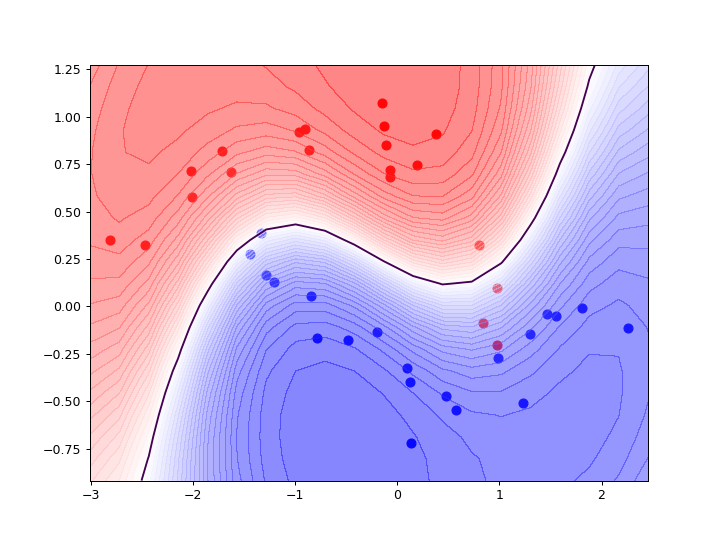

[ 1.32821464 -0.35453342  1.42672403  1.03668382  0.76690113  1.30186604
  0.64516828  0.83618137  0.71400673 -0.55527121  0.97740721  0.80582369
 -0.13800444  1.21619595  0.8916149   0.84289561  0.78893212  1.14456789
  0.32120888  0.93057549 -0.89639697 -0.78229646 -1.24740615 -0.77166267
 -0.90644988 -0.87178215 -0.62794065 -0.90472094 -0.6404364  -0.61891773
 -0.70424851  0.01987305 -1.05959337 -0.94904571 -1.01339184 -0.09593263
 -0.68296001 -0.49352922 -0.38466419 -0.99091   ]
0 [-2.99393492 -1.4984567   0.29960949  0.        ]
10 [-0.25445424  0.26677939  0.65579748  0.        ]
20 [-1.47048302  1.7437958  -3.60280613  0.        ]
30 [-25.68944324  31.10523287 -69.84323645   0.        ]
40 [-0.01788146 -3.31274401  0.6040737   0.        ]
50 [0.17788952 0.14970154 0.58728254 0.        ]
60 [0.19636986 0.45937215 0.55685523 0.        ]
70 [0.18388445 0.33443639 0.55269841 0.        ]
80 [0.16207478 0.02547199 0.564531   0.        ]
90 [ 0.15702694 -0.1762765   0.59385234  0.     

In [1]:
# for showing iteratively
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np


S1 = np.array([[0.2, 0.0],
               [0.0, 0.1]])
S2 = np.array([[0.1, 0.1],
               [0.1, 0.3]])
M1 = np.array([1, 1])
M2 = np.array([0, 0])

cont = None
contf = None
x = None
y = None
level = None

# for Covariance positive definite
V = 1e-8
# early stopping
A_ITERATE_COUNTS = 1000
H_ITERATE_COUNTS = 1000

N = 10
sigmoid = lambda x: 1 / (1 + np.exp(-x))
# xn@xm is too big such that it will affect the theta update step due to partitial derivatives. 
# Also, little variation of theta[3] can lead to big change to the kernel function. 
kernel = lambda theta, xn, xm: theta[0]*np.exp(-theta[1]/2 * np.sum((xn-xm)**2)) + theta[2] + 0*theta[3]*xn@xm

A = None
F = None
t = 0
def Adam(derivatives):
    a0 = 0.1
    rf = 0.9
    r = 0.999
    global A, F, t
    t += 1
    if A is None:
        A = np.full(derivatives.shape, 0)
        F = np.full(derivatives.shape, 0)
    A = r*A + (1-r)*derivatives**2
    F = rf*F + (1-rf)*derivatives
    at = a0 * (np.sqrt(1-r**t)/(1-rf**t))
    return -at/(np.sqrt(A)+1e-8)*F

def gen_data(n):
    noise = np.random.normal(0, 0.2, n)
    p1 = [-1, 1]
    x1 = np.random.uniform(p1[0]-2, p1[0]+2, n)
    y1 = -1/4 * (x1-p1[0])**2 + p1[1] + noise
    X1 = np.c_[x1.reshape(-1, 1), y1.reshape(-1, 1)]
    
    p2 = [.5, -.5]
    x2 = np.random.uniform(p2[0]-2, p2[0]+2, n)
    y2 = 1/4 * (x2-p2[0])**2 + p2[1] - noise
    X2 = np.c_[x2.reshape(-1, 1), y2.reshape(-1, 1)]
    
    X = np.vstack((X1, X2))
    T1 = np.ones(X1.shape[0])
    T2 = np.zeros(X2.shape[0])
    T = np.hstack((T1, T2))
    return X, T

def draw_points(ax, X, T):
    for i in range(len(T)):
        if T[i]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i]==0:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    return

def gen_covariance(X, theta):
    l = len(X)
    CN = np.zeros((l, l))
    for i in range(l):
        for j in range(l):
            CN[i][j] = kernel(theta, X[i], X[j])
            if i==j:
                CN[i][j] += V
    return CN

def partial_derivatives(X, theta, i):
    l = len(X)
    DCN = np.zeros((l, l))
    if i==0:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = np.exp(-theta[1]/2 * np.sum((X[i]-X[j])**2))
    elif i==1:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = theta[0] * (-1/2 * np.sum((X[i]-X[j])**2)) * np.exp(-theta[1]/2 * np.sum((X[i]-X[j])**2))
    elif i==2:
        DCN = np.ones((l, l))
#     elif i==3:
#         for i in range(l):
#             for j in range(l):
#                 DCN[i][j] = X[i] @ X[j]
    return DCN

# Learning the hyperparameters
def hyperparameter_optmization(fig, ax, X, T, theta, astar): 
    length = len(T)
    derivatives = np.zeros(4)
    I = np.identity(length)
    Sigma = sigmoid(astar)
    WN = np.diag(Sigma*(1-Sigma))
    Sigma2 = 1-2*Sigma
    for j in range(H_ITERATE_COUNTS):
        CN = gen_covariance(X, theta)
        ICN = np.linalg.inv(CN)
        ICWI = np.linalg.inv(CN @ WN + I)
        #IWCI = np.linalg.inv(WN @ CN + I)
        for i in range(4):
            DCN = partial_derivatives(X, theta, i)
            route1 = -1/2 * astar.T @ ICN @ DCN @ ICN @ astar + 1/2 * np.trace(ICWI @ WN @ DCN)
            route2 = 1/2 * np.diag(np.diag(ICWI @ CN)) @ WN @ Sigma2 @ (ICWI @ DCN @ (T-Sigma))
            derivatives[i] = route1 + route2
        if j%10==0:
            print(j, derivatives)
            draw_border(fig, ax, X, T, theta, astar)
        if np.allclose(derivatives, 0):
            print("stationary point found!!!")
            break
        theta += Adam(derivatives)
    return theta

def find_Astar(X, T, CN):
    length = len(T)
    aN = np.random.normal(0, 1, length)
    I = np.identity(length)
    ICN = np.linalg.inv(CN)
    for i in range(A_ITERATE_COUNTS):
        sigmaN = sigmoid(aN)
        gradient = ICN @ aN - T + sigmaN
        if np.allclose(gradient, 0):
            print("A star!!!")
            break
        WN = np.diag(sigmaN*(1-sigmaN))
        aN = CN @ np.linalg.inv(I + WN @ CN) @ (T - sigmaN + WN @ aN)
    return aN

def draw_border(fig, ax, X, T, theta, astar):
    global cont, contf, x, y, level
    if x is None:
        xmin = np.amin(X.T[0])-.2
        xmax = np.amax(X.T[0])+.2
        ymin = np.amin(X.T[1])-.2
        ymax = np.amax(X.T[1])+.2
        x, y = np.mgrid[xmin:xmax:20j, ymin:ymax:20j]
        level = np.linspace(0,1,50)
        #level = 50
    p = np.zeros(x.shape)
    K = np.zeros(T.shape)
    
    sigma = sigmoid(astar)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            xp = np.array([x[i][j], y[i][j]])
            for n in range(len(T)):
                K[n] = kernel(theta, xp, X[n])
            p[i][j] = K @ (T-sigma)
    if cont is not None:
        for coll in cont.collections: 
            coll.remove()
        for coll in contf.collections: 
            coll.remove()
    p = sigmoid(p)
    contf = ax.contourf(x, y, p, level, cmap=plt.cm.bwr, alpha=.5)
    cont = ax.contour(x, y, p, [0.5])
    fig.canvas.draw()
    return

def main():
    fig = plt.figure(figsize=(8,6), dpi=60)
    ax = fig.add_subplot(1,1,1)
    X, T = gen_data(20)
    draw_points(ax, X, T)
    
    theta = np.ones(4)
    theta[3] = 1e-4
    #theta = np.random.normal(0, 0.1, 4)
    CN = gen_covariance(X, theta)
    astar = find_Astar(X, T, CN)
    print(astar)

    theta = hyperparameter_optmization(fig, ax, X, T, theta, astar)

    draw_border(fig, ax, X, T, theta, astar)
        
    plt.show()
    
if __name__=="__main__":
    main()